## Visualize the selected study area and rgi60 glacier area

In [3]:
import os
import warnings
warnings.filterwarnings('ignore')
root_proj = '/Users/luo/OneDrive/GitHub/Glacier-in-RGI1305'
os.chdir(root_proj)



In [4]:
import geopandas as gpd
from shapely.geometry import MultiPolygon, box
from shapely.ops import unary_union
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff
from utils.imgShow import imgShow
from utils.transform_xy import coor2coor
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader


In [21]:
path_tibet_vec = 'data/TPlateau-boundary/TPBoundary_new2021.gpkg'
path_dem = 'data/dem-data/tandem-x/tandem_wkunlun.tif'
path_img = 'data/rsimg/l8_kunlun_20200914.tif'
path_wkunlun = 'data/study-area/study_area.shp'


In [58]:
extent_tibet = gpd.read_file(path_tibet_vec)
extent_wkunlun = gpd.read_file(path_wkunlun)


In [59]:
### extract x,y coordinates
region_x, region_y = extent_wkunlun['geometry'][0].exterior.coords.xy


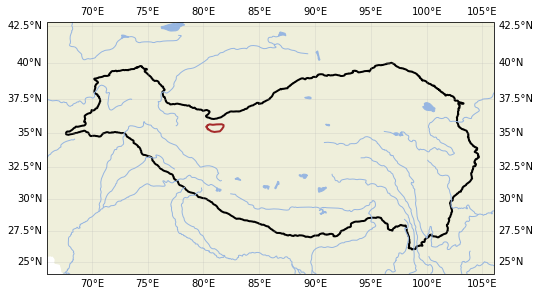

In [60]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator(central_longitude=88.5))
ax.set_extent([66, 106, 24.0, 41.0])
## 1. tibet boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_tibet_vec).geometries(), \
                            crs=ccrs.PlateCarree(), edgecolor='Black', linewidth=2, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)
## 2. study region 
plt.plot(region_x, region_y, transform=ccrs.PlateCarree(), linewidth=2, color='Brown')



### Visualize the rgi60 glacier of the selected region.

In [61]:
### check rgi60 glacier data
path_rgi60_wkunlun = root_proj +'/data/rgi60-wkunlun/rgi60_1305_selected.gpkg'
rgi60_wkunlun = gpd.read_file(path_rgi60_wkunlun)
print(rgi60_wkunlun.shape)
rgi60_wkunlun.head(2)


(449, 23)


,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-13.36903,G081529E35269N,20101208,-9999999,81.529,35.269,13,5,2.122,5554,...,109,3227,0,0,0,0,9,9,None,"MULTIPOLYGON (((81.52654 35.27546, 81.52639 35..."
1,RGI60-13.36904,G081529E35280N,20101208,-9999999,81.529,35.280,13,5,4.360,5539,...,103,5049,0,0,1,0,9,9,None,"MULTIPOLYGON (((81.51471 35.28415, 81.51618 35..."


<AxesSubplot:>

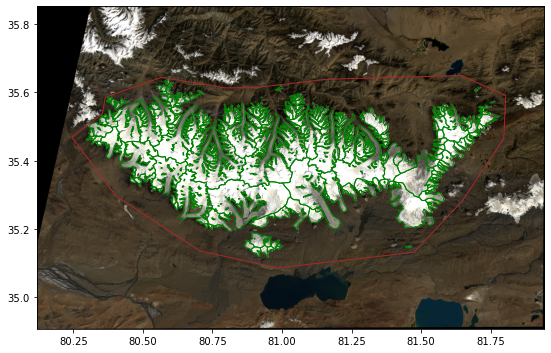

In [64]:
### convert projection coordinates to wgs84 coordinates
rs_img, rs_img_info = readTiff(path_img)
lon1,lon2,lat1,lat2  = rs_img_info['geoextent']
lon_wgs84, lat_wgs84 = coor2coor(srs_from=rs_img_info['geosrs'], \
                          srs_to=4326, x=[lon1, lon2], y=[lat1,lat2])
extent_wgs84 = lon_wgs84 + lat_wgs84

### visualization
plt.figure(figsize=(20, 8))
ax1 = plt.subplot(1,2,1)
imgShow(rs_img, extent = extent_wgs84, \
                        color_bands=(2, 1, 0), clip_percent=5)
extent_wkunlun.plot(ax=ax1, linewidth=1, color='none',\
                          edgecolor='brown', label='glacier')

rgi60_wkunlun.plot(ax=ax1, linewidth=1, color='none',\
                          edgecolor='green', label='glacier')


Count of glaciers: 449


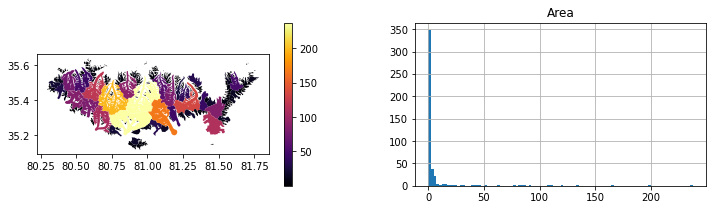

In [88]:
### statics of the glaciers
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
rgi60_wkunlun.plot('Area', ax=ax[0], markersize=1,\
                              cmap='inferno', legend=True);
hist = rgi60_wkunlun.hist(ax=ax[1], column='Area', bins=100)
print('Count of glaciers:',rgi60_wkunlun.shape[0])
